In [1]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import decimal as d
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [2]:
pulse_energies = "13J  14J  15J  16J  17J  18J  19J".split()
file_prefix = "../../data/20240925/"
sample_rates = []
sizes = []
trace_length = []

data = []
time = []
for p in pulse_energies:
    rate = np.array([])
    size = np.array([], dtype = int)
    length = np.array([], dtype = np.dtype(d.Decimal))
    
    x = np.array([])
    t = np.array([], dtype = np.dtype(d.Decimal))
    for i in range(1, 1001):
        file = open(file_prefix + p + "/shot" + str(i) + ".csv")
        file.readline()
        rate = np.append(rate, float(file.readline()))
        file.readline()
        size = np.append(size, int(file.readline()))
        file.readline()
        length = np.append(length, d.Decimal(file.readline()))
        file.readline()
        if i == 1:
            x = np.append(x, np.array([d.Decimal(a) for a in file.readline().split(",")], dtype = np.dtype(d.Decimal)))
            x = scp.signal.detrend(x, type = "linear")
        else:
            x = np.vstack((x, np.array([d.Decimal(a) for a in file.readline().split(",")], dtype = np.dtype(d.Decimal))))
            x[-1] = scp.signal.detrend(x[-1], type = "linear")
        if i == 1:
            t = np.append(t, np.array([length[-1] * (d.Decimal(b) / d.Decimal(str(size[-1]))) for b in range(0, size[-1])], dtype = np.dtype(d.Decimal)))
        else:
            t = np.vstack((t, np.array([length[-1] * (d.Decimal(b) / d.Decimal(str(size[-1]))) for b in range(0, size[-1])], dtype = np.dtype(d.Decimal))))
        file.close()
    sample_rates.append(rate)
    sizes.append(size)
    trace_length.append(length)
    
    data.append(x)
    time.append(t)

In [ ]:
pulse_energies = "13J  14J  15J  16J  17J  18J  19J".split()
file_prefix = "../../data/20240925/"
sample_rates = []
sizes = []
trace_length = []
data = []
time = []
def set_data(file_pre = "", folders = []):
    import multiprocessing
    import time
    pool = 
    
def set_shot(file_name, rate = np.array([]), size = np.array([], dtype = int), length = np.array([], dtype = np.dtype(d.Decimal)), x = np.array([], dtype = np.dtype(d.Decimal)), t = np.array([], dtype = np.dtype(d.Decimal))):
    import multiprocessing
    import time
    f = open(file_name)
    f.readline()
    

for p in pulse_energies:
    rate = np.array([])
    size = np.array([], dtype = int)
    length = np.array([], dtype = np.dtype(d.Decimal))
    
    x = np.array([])
    t = np.array([], dtype = np.dtype(d.Decimal))
    for i in range(1, 1001):
        file = open(file_prefix + p + "/shot" + str(i) + ".csv")
        file.readline()
        rate = np.append(rate, float(file.readline()))
        file.readline()
        size = np.append(size, int(file.readline()))
        file.readline()
        length = np.append(length, d.Decimal(file.readline()))
        file.readline()
        if i == 1:
            x = np.append(x, np.array([d.Decimal(a) for a in file.readline().split(",")], dtype = np.dtype(d.Decimal)))
            x = scp.signal.detrend(x, type = "linear")
        else:
            x = np.vstack((x, np.array([d.Decimal(a) for a in file.readline().split(",")], dtype = np.dtype(d.Decimal))))
            x[-1] = scp.signal.detrend(x[-1], type = "linear")
        if i == 1:
            t = np.append(t, np.array([length[-1] * (d.Decimal(b) / d.Decimal(str(size[-1]))) for b in range(0, size[-1])], dtype = np.dtype(d.Decimal)))
        else:
            t = np.vstack((t, np.array([length[-1] * (d.Decimal(b) / d.Decimal(str(size[-1]))) for b in range(0, size[-1])], dtype = np.dtype(d.Decimal))))
        file.close()
    sample_rates.append(rate)
    sizes.append(size)
    trace_length.append(length)
    
    data.append(x)
    time.append(t)

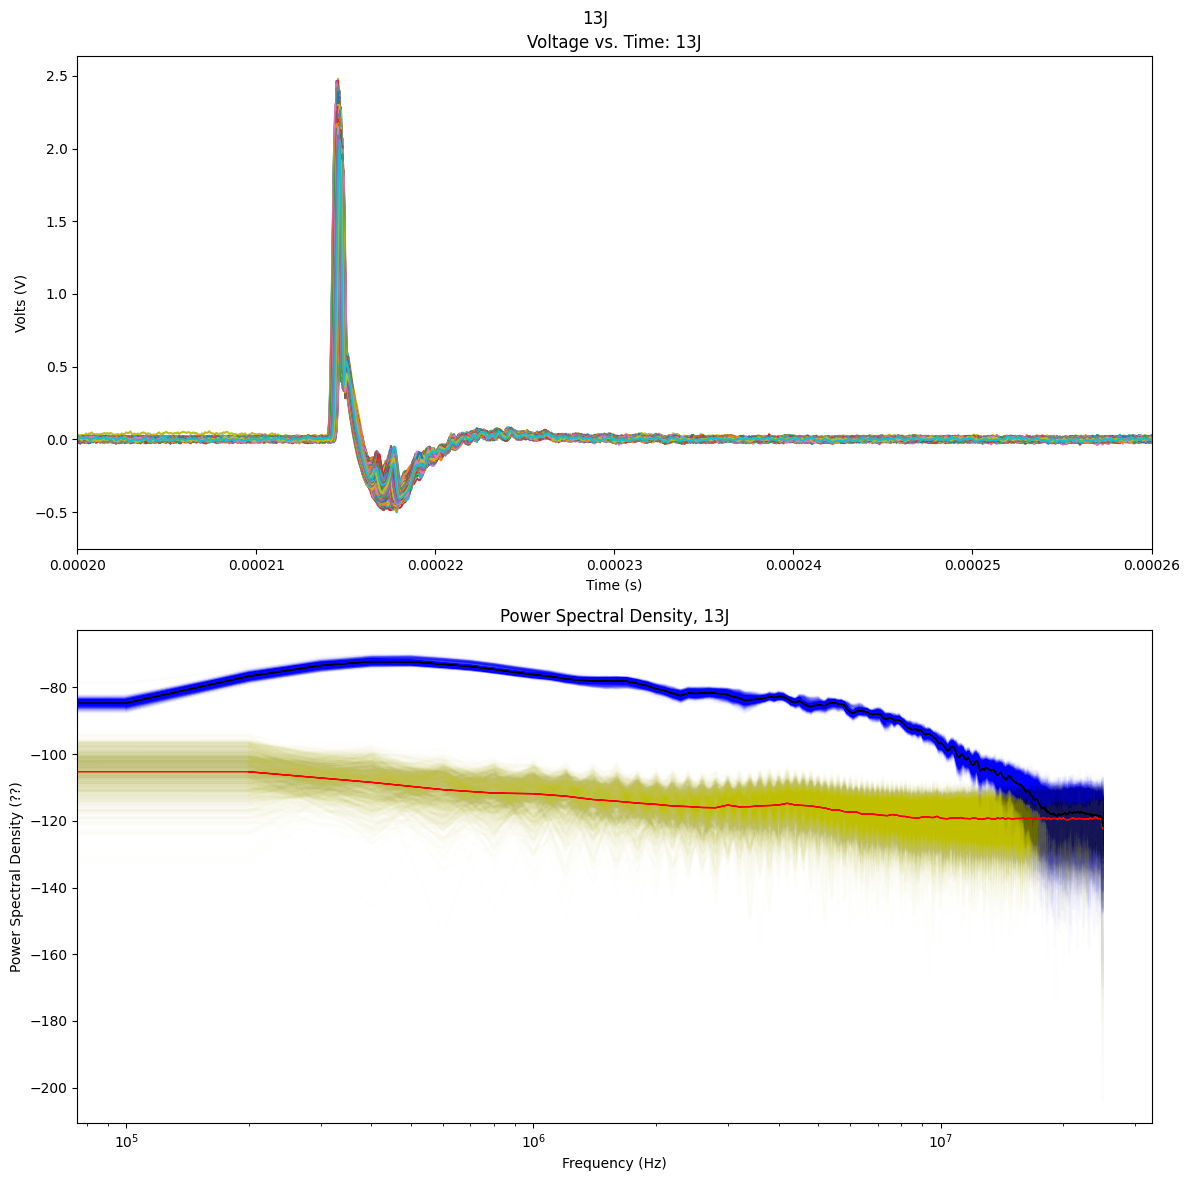

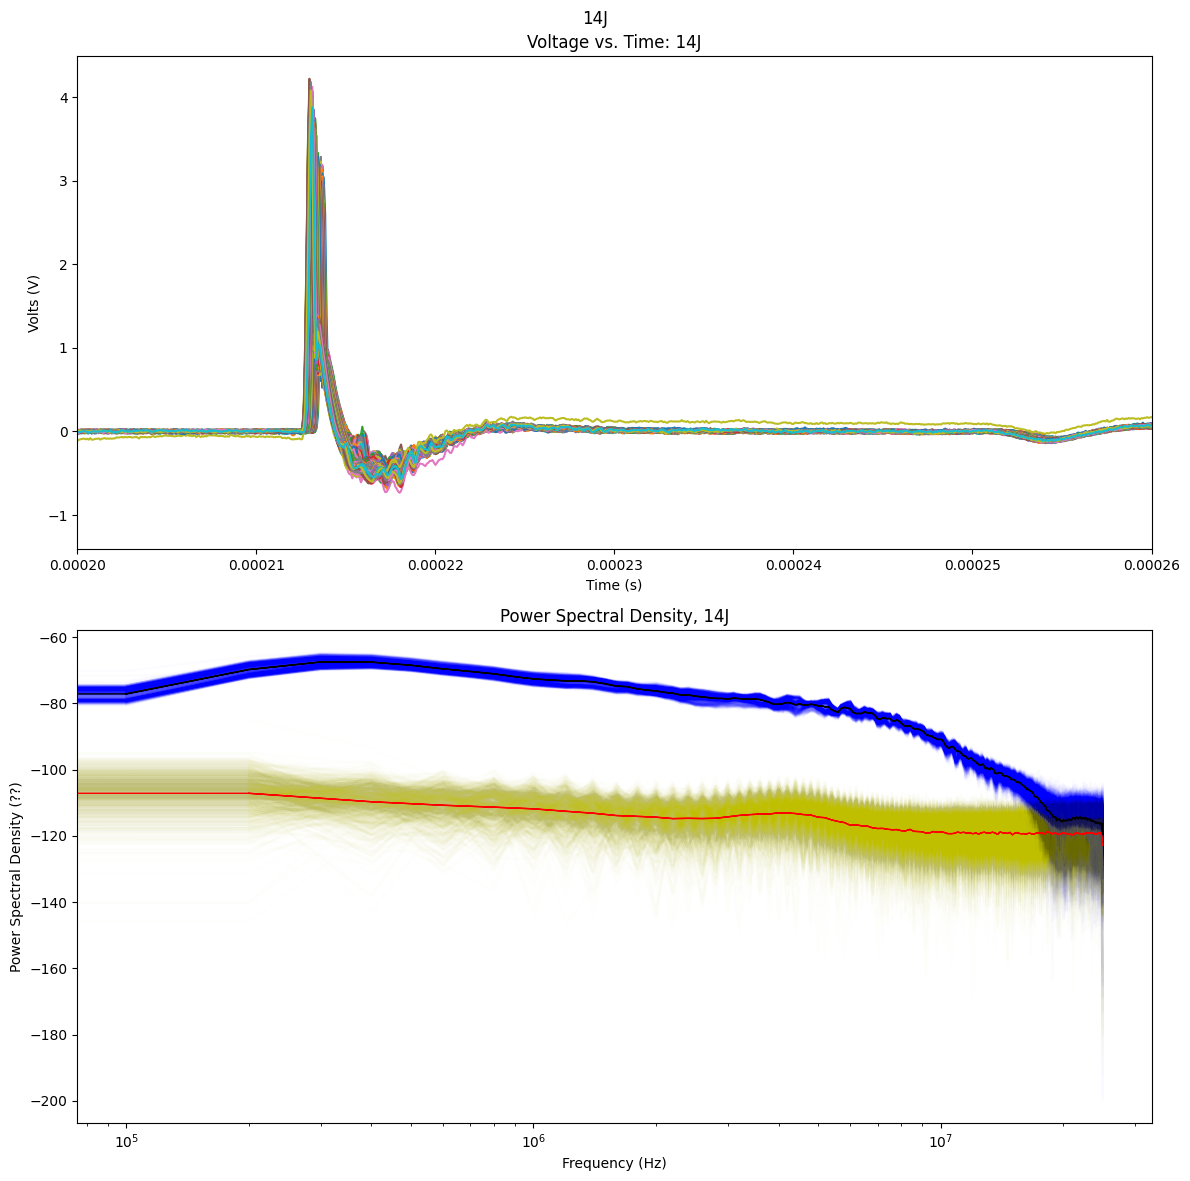

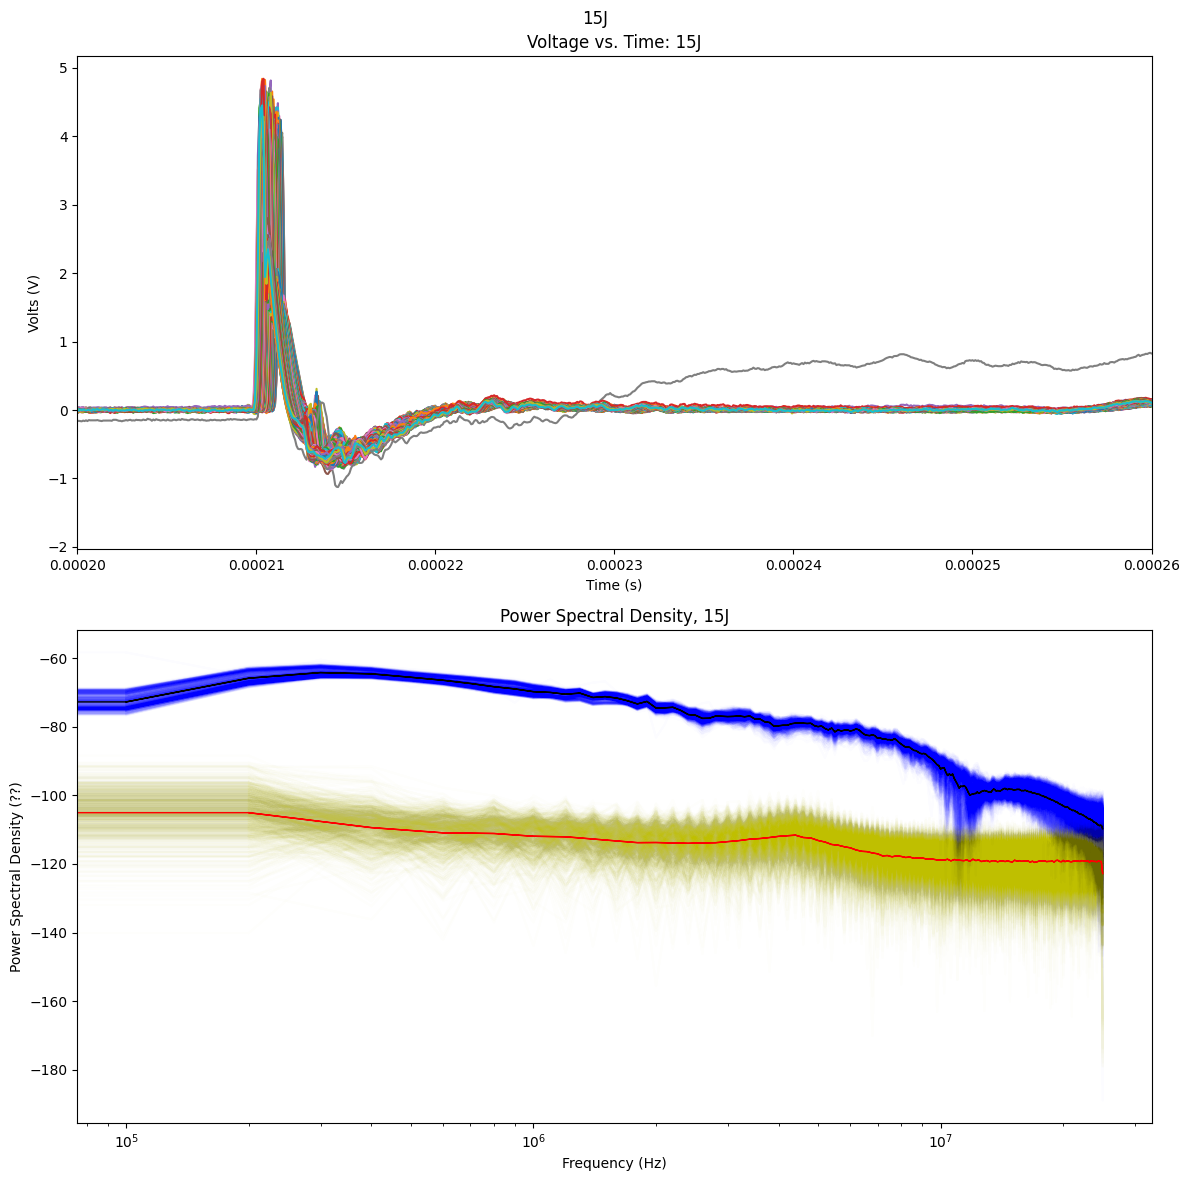

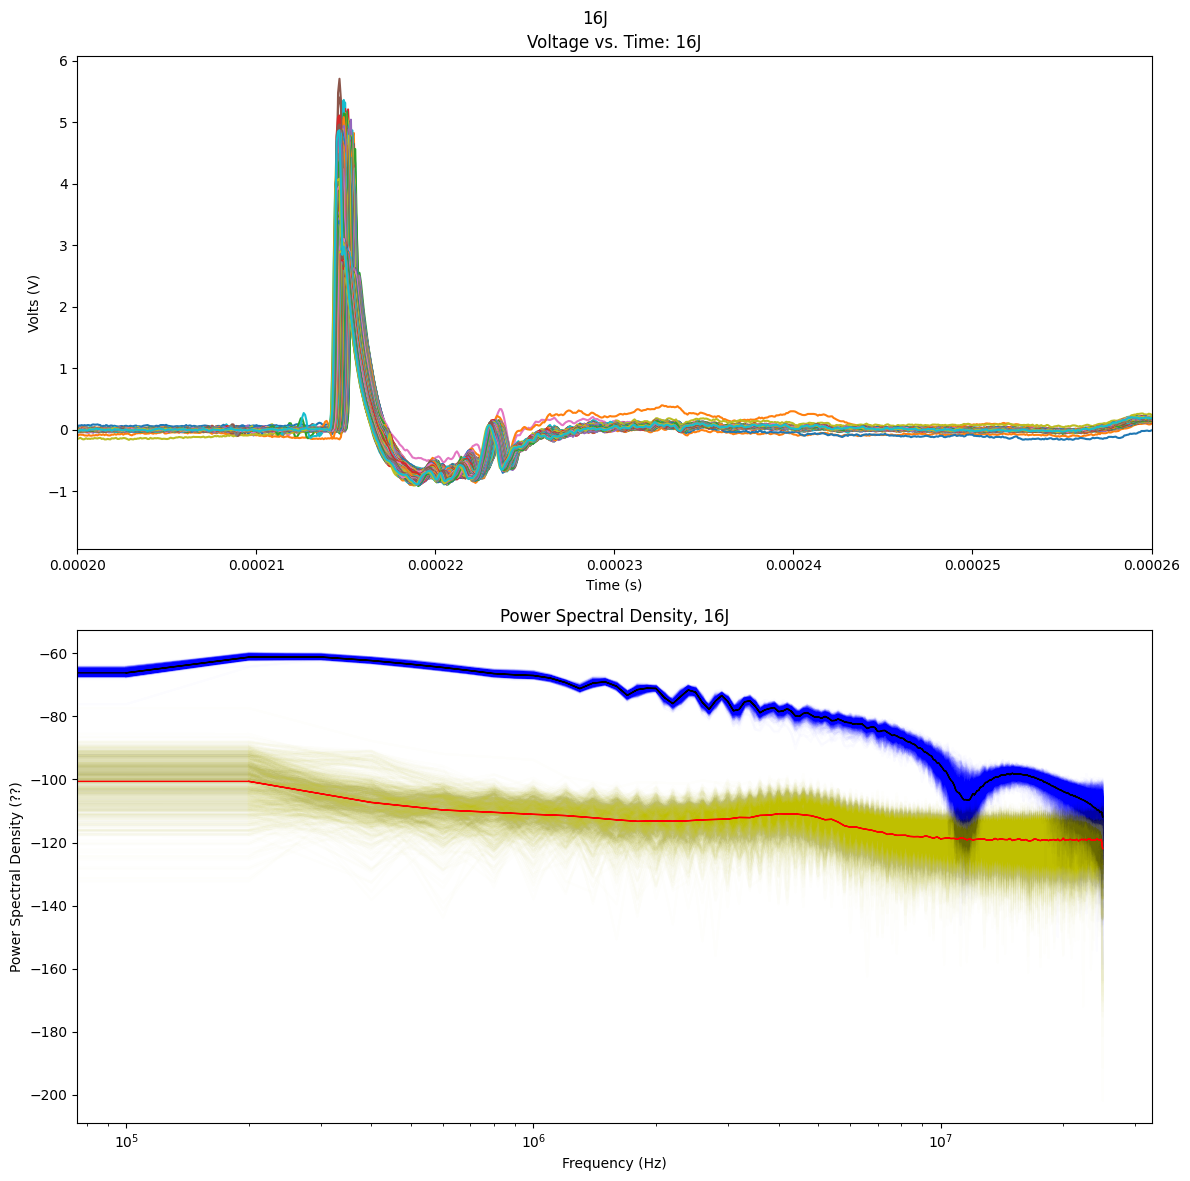

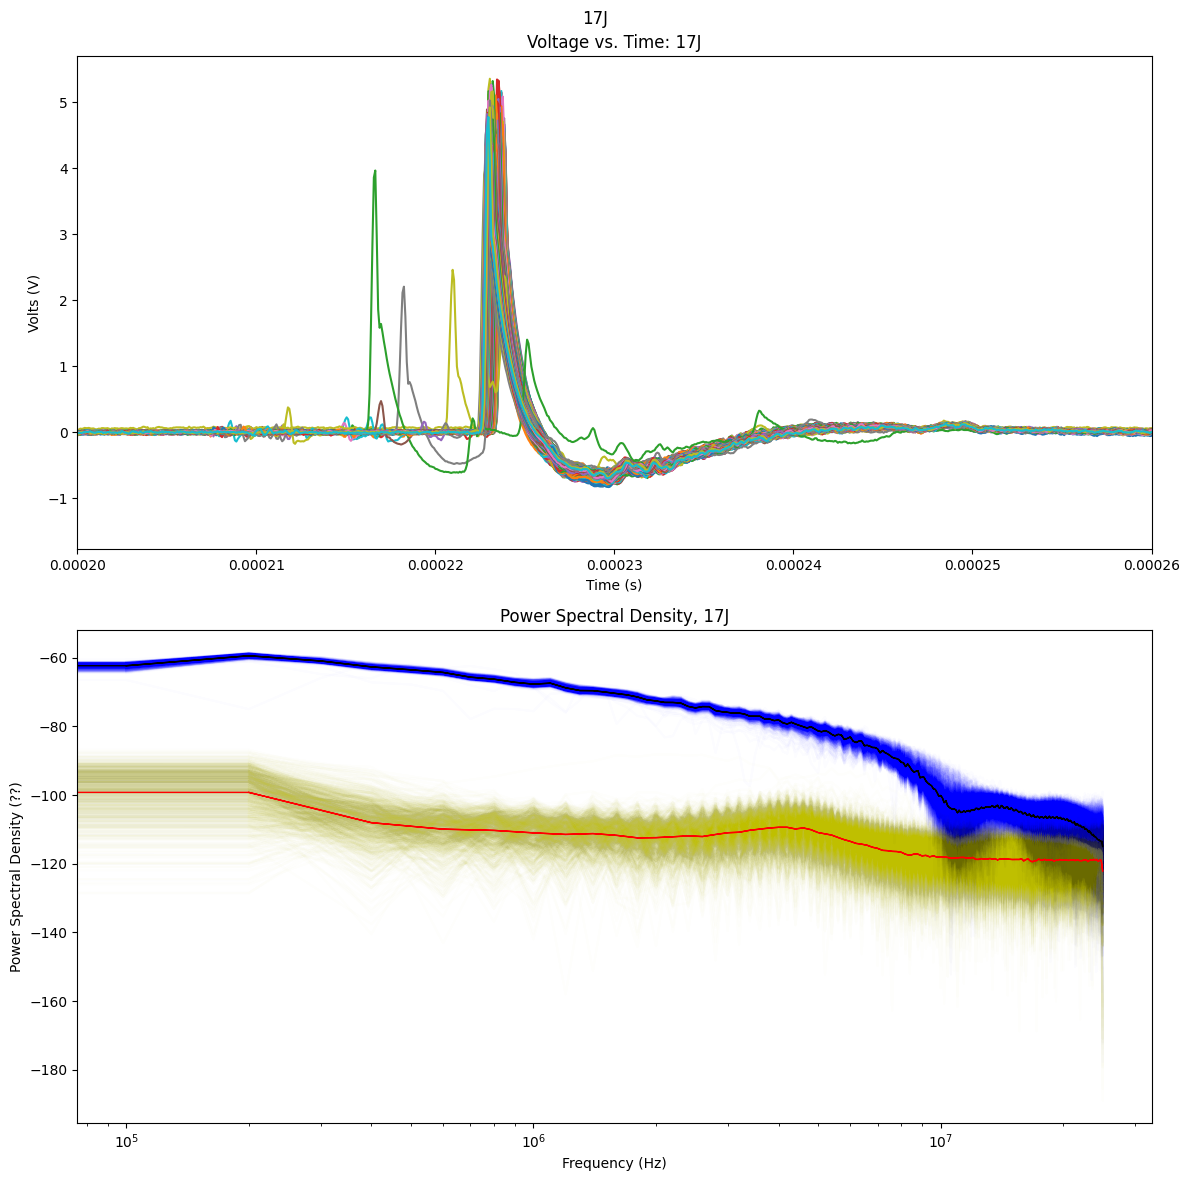

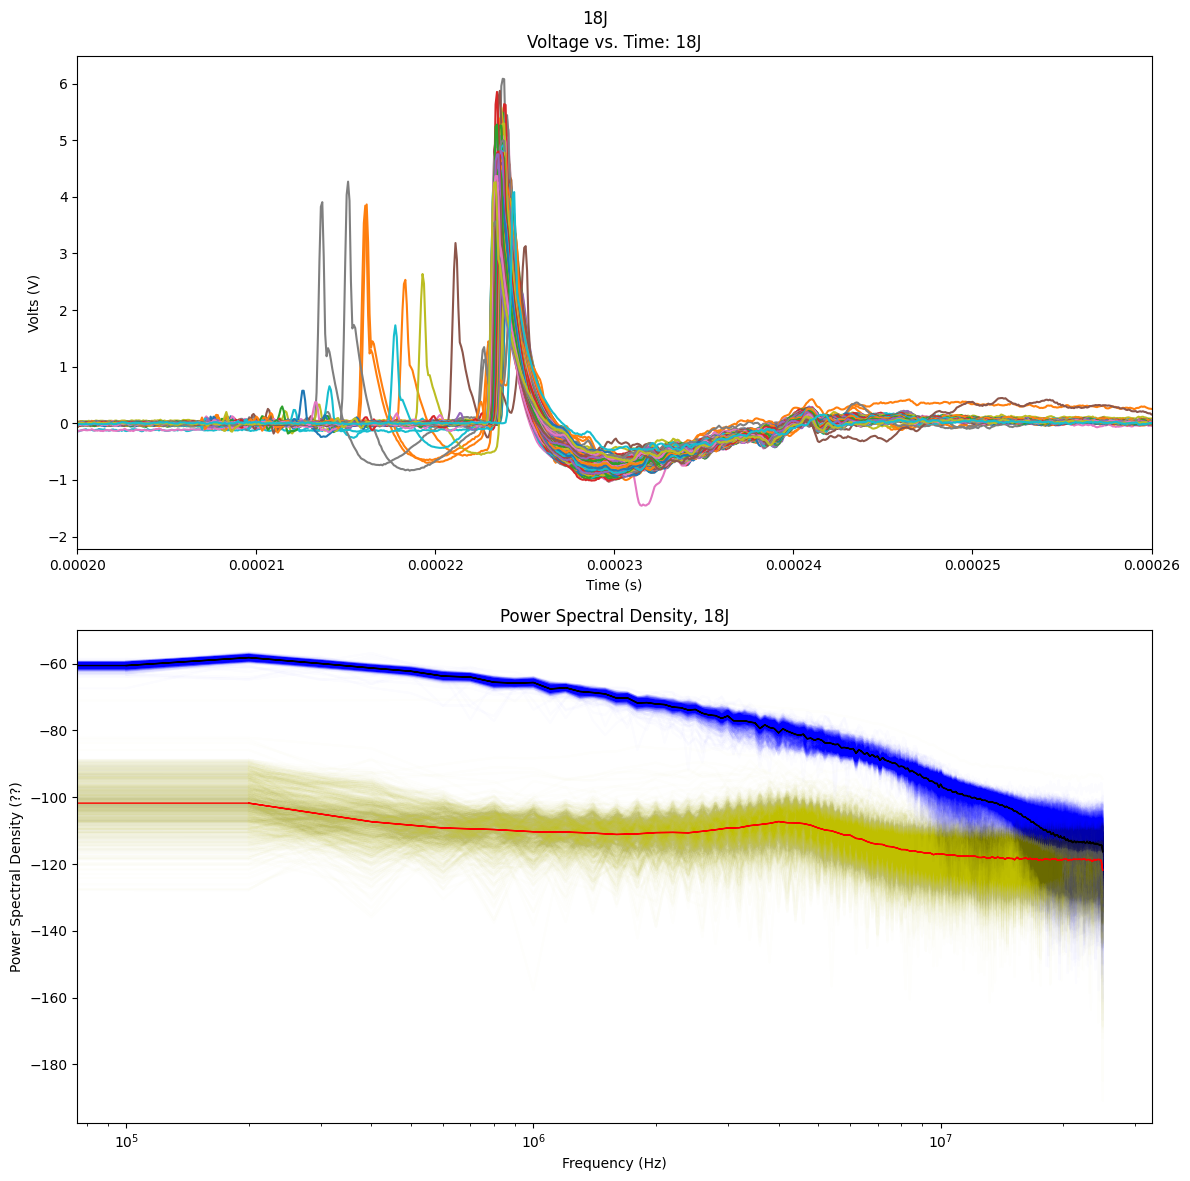

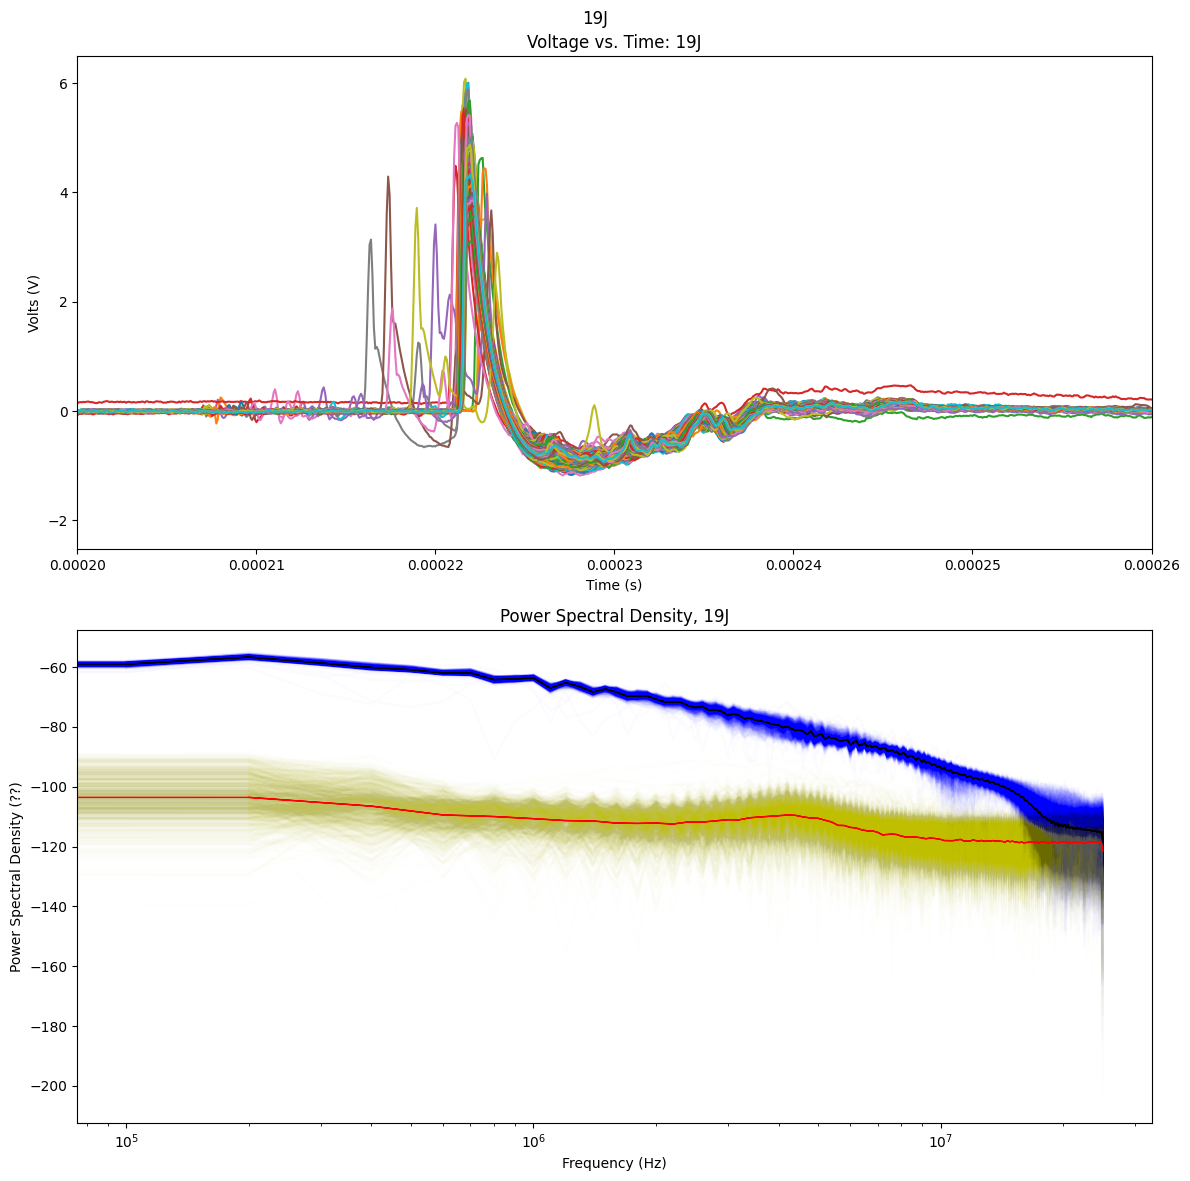

In [8]:
sig_times = []
signal = []
noise = []
signal_freq = []
noise_freq = []
# indexes = np.array(np.delete(np.linspace(0, len(pulse_energies) - 1, len(pulse_energies)), 3), dtype = int)
# for i in indexes:
for i in range(0, 7):
    fig, ax = plt.subplots(2, 1, figsize = (12, 12))
    sig = np.array([])
    noi = np.array([])
    sig_fre = np.array([])
    noi_fre = np.array([])
    ### THESE VALUES DECIDE THE INDEXES BEING USED TO CREATE THE PSD GRAPHS
    min = 0
    max = len(data[i])
    ###
    for j in range(min, max):
        ax[0].plot(time[i][j].astype(np.float64), data[i][j].astype(np.float64))
        s_fft = np.fft.fft(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 125:find_idx(data[i][j], np.max(data[i][j])) + 375], len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 125:find_idx(data[i][j], np.max(data[i][j])) + 375]), axis = 0)
        s_f = np.fft.fftfreq(len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 125:find_idx(data[i][j], np.max(data[i][j])) + 375]))
        n_fft = np.fft.fft(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 375:find_idx(data[i][j], np.max(data[i][j])) - 125], len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 375:find_idx(data[i][j], np.max(data[i][j])) - 125]), axis = 0)
        n_f = np.fft.fftfreq(len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 375:find_idx(data[i][j], np.max(data[i][j])) - 125]))
        if j == min:
            sig = np.append(sig, 10 * np.log10(1 / (len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 125:find_idx(data[i][j], np.max(data[i][j])) + 375]) * sample_rates[i][j]) * np.power(np.abs(s_fft), 2)))
            noi = np.append(noi, 10 * np.log10((1 / (len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 375:find_idx(data[i][j], np.max(data[i][j])) - 125]) * sample_rates[i][j])) * np.power(np.abs(n_fft), 2)))
            sig_fre = np.append(sig_fre, np.abs(s_f) * 5e7)
            noi_fre = np.append(noi_fre, np.abs(n_f) * 5e7)
        else:
            sig = np.vstack((sig, 10 * np.log10((1 / (len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 125:find_idx(data[i][j], np.max(data[i][j])) + 375]) * sample_rates[i][j])) * np.power(np.abs(s_fft), 2))))
            noi = np.vstack((noi, 10 * np.log10((1 / (len(data[i][j][find_idx(data[i][j], np.max(data[i][j])) - 375:find_idx(data[i][j], np.max(data[i][j])) - 125]) * sample_rates[i][j])) * np.power(np.abs(n_fft), 2))))
            sig_fre = np.vstack((sig_fre, np.abs(s_f) * 5e7))
            noi_fre = np.vstack((noi_fre, np.abs(n_f) * 5e7))
        ax[1].plot(sig_fre[-1], sig[-1], c = "b", alpha = 0.01)
        ax[1].plot(noi_fre[-1], noi[-1], c = "y", alpha = 0.01)
    signal.append(sig)
    noise.append(noi)
    signal_freq.append(sig_fre)
    noise_freq.append(noi_fre)
    
    # ax[0].plot(np.mean(time[i], axis = 0), np.mean(data[i], axis = 0), c = "k")
    ax[0].set_title("Voltage vs. Time: " + pulse_energies[i])
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Volts (V)")
    ax[0].set_xlim(2e-4, 2.6e-4)
    
    ax[1].plot(np.mean(noi_fre, axis = 0), np.mean(noi, axis = 0), c = "r", lw = 1)
    ax[1].plot(np.mean(sig_fre, axis = 0), np.mean(sig, axis = 0), c = "k", lw = 1)
    ax[1].set_xscale("log")
    ax[1].set_title("Power Spectral Density, " + pulse_energies[i])
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_ylabel("Power Spectral Density (??)")
    # ax[1].set_xlim(-1, 2e7)
    # ax[1].set_ylim(np.min(np.mean(noi, axis = 0)) - 5, np.max(np.mean(sig, axis = 0)) + 5)

    fig.suptitle(pulse_energies[i])
    
    plt.tight_layout()
    plt.show()